In [1]:
# !pip install wheel setuptools pip --upgrade

In [2]:
# !pip install gymnasium
# !pip install swig
# !pip install gymnasium[box2d]

In [3]:
import tensorflow as tf
from tensorflow import keras
import gym as gym
from gym.spaces import Box
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter
from datetime import timedelta

In [4]:
import ddpg
import memory
import models
import utils

In [9]:
env = gym.make('BipedalWalker-v3')
params = {
    'env_name' : 'BipedalWalker-v3',
    'n_runs': 1,
    'n_actions': env.action_space.shape[0],
    'action_bounds': [env.action_space.low, env.action_space.high],
    'obs_shape': (1, *env.observation_space.shape),
    'n_steps': 500_000,  # env steps
    'evaluation_frequency': 100,  # evaluate agent every that many episodes
    'actor_lr': 0.0003,
    'critic_lr': 0.0004,
    'gamma': 0.99,
    'tau': 0.001,
    'minibatch': 64,
    'buffer_size': 1_000_000,
    'n_neurons': [128, 128],  # number of neurons for each of the hidden layers
    'learning_starts': 10_000,  # play randomly for that many steps
    'random_process_parameters': [0, 0.1],  # [mean, stddev]
    'seed' : 2023
}


In [10]:
all_episode_returns = []
all_episode_lengths = []
all_critic_losses = []

In [11]:
for i in range(params['n_runs']):
  # utils.set_seed(params['seed']+i)
  agent = models.Agent(params)
  target_agent = models.Agent(params)
  s = np.array([env.observation_space.sample()])
  a, at = agent.actor.call(s), target_agent.actor.call(s)
  q, qt = agent.critic.call([s, a]), target_agent.critic.call([s, at])
  start_time = perf_counter()
  episode_returns, episode_lengths, critic_losses = ddpg.train(agent=agent, target_agent=target_agent, params=params)
  end_time = perf_counter()

  print(f"\nRun:{i} Training time: _ _ _ _ _{str(timedelta(seconds=end_time - start_time))}_ _ _ _ _")

  all_episode_lengths.append(episode_lengths)
  all_episode_returns.append(episode_returns)
  all_critic_losses.append(critic_losses)

step:78         episode:1       return:-122    length:77
step:1678       episode:2       return:-89     length:1600
step:1740       episode:3       return:-101    length:62
step:3340       episode:4       return:-79     length:1600
step:4940       episode:5       return:-83     length:1600
step:5001       episode:6       return:-114    length:61
step:5064       episode:7       return:-110    length:63
step:6664       episode:8       return:-84     length:1600
step:8264       episode:9       return:-89     length:1600
step:8352       episode:10      return:-99     length:88
step:9952       episode:11      return:-87     length:1600
step:10086      episode:12      return:-111    length:134
step:10217      episode:13      return:-115    length:131
step:10255      episode:14      return:-119    length:38
step:10348      episode:15      return:-114    length:93
step:10503      episode:16      return:-115    length:155
step:10573      episode:17      return:-111    length:70
step:10777      

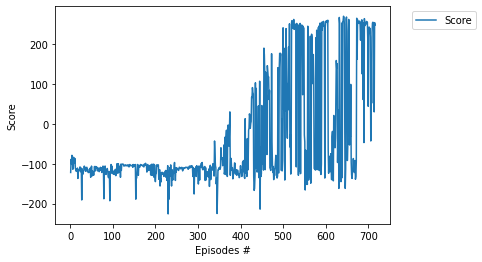

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(all_episode_returns[0])+1), all_episode_returns[0], label="Score")
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.ylabel('Score')
plt.xlabel('Episodes #')
plt.show()

In [ ]:
# Export 1D array to CSV (values along columns)
df_1d = pd.DataFrame(all_episode_returns[0])
df_1d.to_csv('DDPG.csv', index=False, header=False)